In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
import requests

from datetime import datetime

In [3]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
s = requests.get(url).content
confirmed_data = pd.read_csv(io.StringIO(s.decode('utf-8')),sep = ',')
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6955,7005,7050,7084,7127,7162,7190,7236,7288,7338
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,15493,15536,15591,15648,15729,15804,15925,16061,16161,16188


In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
s = requests.get(url).content
death_data = pd.read_csv(io.StringIO(s.decode('utf-8')),sep = ',')
death_data.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1846,1864,1874,1900,1906,1919,1935,1945,1956,1965
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,870,889,905,922,936,951,965,977,989,1003
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2492,2501,2516,2527,2539,2554,2564,2575,2584,2596


In [5]:
confirmed_data.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
confirmed_data = confirmed_data.groupby('Country/Region').sum()

confirmed_data.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,46837,47072,47306,47516,47716,47851,48053,48116,48229,48527
Albania,0,0,0,0,0,0,0,0,0,0,...,41302,42148,42988,43683,44436,45188,46061,46863,47742,48530
Algeria,0,0,0,0,0,0,0,0,0,0,...,86730,87502,88252,88825,89416,90014,90579,91121,91638,92102


In [7]:
death_data.drop(['Province/State', 'Lat', 'Long'], axis = 1, inplace = True)
death_data = death_data.groupby('Country/Region').sum()

death_data.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1846,1864,1874,1900,1906,1919,1935,1945,1956,1965
Albania,0,0,0,0,0,0,0,0,0,0,...,870,889,905,922,936,951,965,977,989,1003
Algeria,0,0,0,0,0,0,0,0,0,0,...,2492,2501,2516,2527,2539,2554,2564,2575,2584,2596


In [8]:
data = pd.DataFrame(columns=['Date', 'Confirmed', 'Death'])
data['Date'] = death_data.columns
data['Confirmed'] = [confirmed_data[date].sum() for date in confirmed_data.columns]
data['Death'] = [death_data[date].sum() for date in death_data.columns]
data

,Date,Confirmed,Death
0,1/22/20,555,17
1,1/23/20,654,18
2,1/24/20,941,26
3,1/25/20,1434,42
4,1/26/20,2118,56
...,...,...,...
322,12/9/20,68958286,1569389
323,12/10/20,70450484,1581842
324,12/11/20,71148112,1594754
325,12/12/20,71773042,1604978


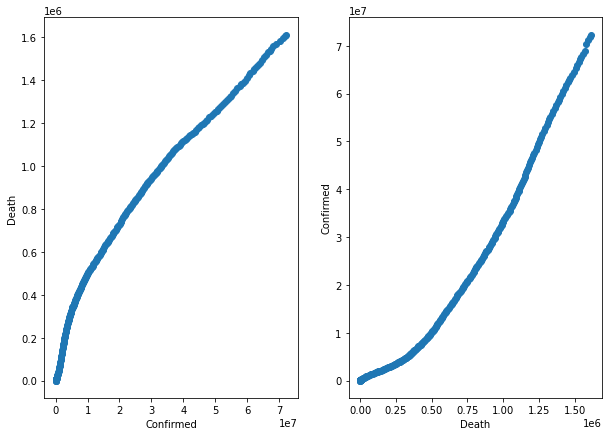

In [9]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,7)
axes[0].scatter(data['Confirmed'], data['Death'])
axes[0].set_ylabel('Death')
axes[0].set_xlabel('Confirmed')

axes[1].scatter(data['Death'], data['Confirmed'])
axes[1].set_ylabel('Confirmed')
axes[1].set_xlabel('Death')

plt.show()

In [10]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime 

In [11]:
def outputMetrcis(y_true, y_pred):
    print('RMSE score\t: ', mean_squared_error(y_true, y_pred, squared = True))
    print('R2 score\t: ', r2_score(y_true, y_pred))

In [12]:
X = np.log(data[['Confirmed']])
y = np.log(data['Death'])

In [13]:
model = SVR(C = 1)
model.fit(X, y)
outputMetrcis(y, model.predict(X))

RMSE score	:  0.025017488259206848
R2 score	:  0.996245971837858


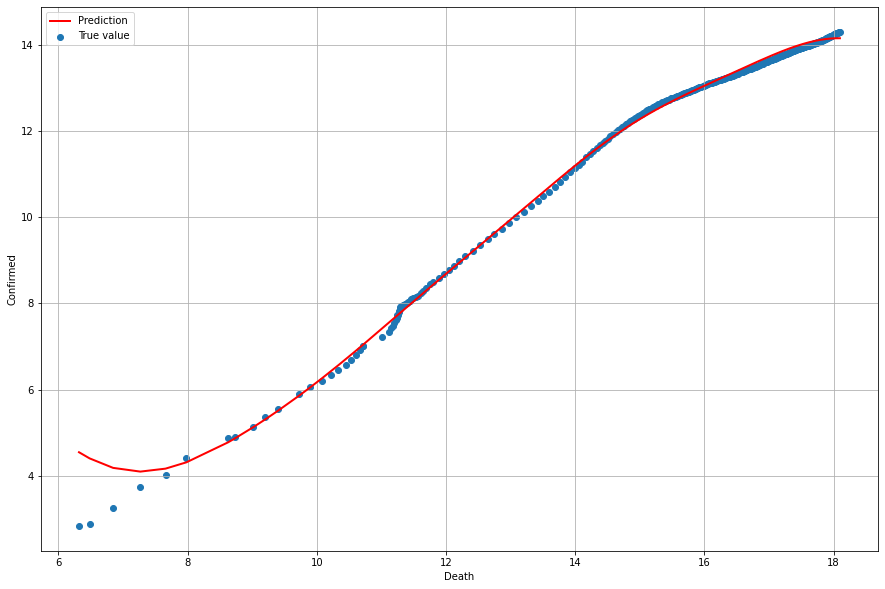

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

ax.scatter(X, y)
ax.plot(X, model.predict(X), color='red', linewidth=2)
ax.grid(True)
ax.legend(['Prediction', 'True value'])
ax.set_ylabel('Confirmed')
ax.set_xlabel('Death')

plt.show()

In [16]:
data = pd.read_csv('data.csv', delimiter = ';')
data = data[data['Страна'] == 'Россия']
data.reset_index(drop=True, inplace=True)
data.head(5)

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день
0,Россия,22.01.2020,0,0,0,0,0,0
1,Россия,23.01.2020,0,0,0,0,0,0
2,Россия,24.01.2020,0,0,0,0,0,0
3,Россия,25.01.2020,0,0,0,0,0,0
4,Россия,26.01.2020,0,0,0,0,0,0


In [17]:
for column in ['Заражений', 'Выздоровлений', 'Смертей']:
    temp_data = data.drop(data[data[column] == 0].index)
    growth_rate = ((temp_data.iloc[-1][column]/temp_data.iloc[0][column])**(1./len(temp_data[column])))*100
    print(f'Средний темп роста {column.lower()}: ', growth_rate, '%')
    print(f'Средний темп роста {column.lower()}: ', growth_rate - 100, '%') 
    print('\n')

Средний темп роста заражений:  104.53019211231356 %
Средний темп роста заражений:  4.530192112313557 %


Средний темп роста выздоровлений:  104.63288476731927 %
Средний темп роста выздоровлений:  4.632884767319268 %


Средний темп роста смертей:  104.05993219737712 %
Средний темп роста смертей:  4.0599321973771225 %




In [18]:
for column in ['Заражений', 'Выздоровлений', 'Смертей']:
        data[f'Цепной_темп_роста_{column.lower()}'] = (data[column]/data[column].shift(1))*100
        data[f'Цепной_темп_прироста_{column.lower()}'] = data[f'Цепной_темп_роста_{column.lower()}'] - 100

In [19]:
data

,Страна,Дата,Заражений,Выздоровлений,Смертей,Заражений за день,Выздоровлений за день,Смертей за день,Цепной_темп_роста_заражений,Цепной_темп_прироста_заражений,Цепной_темп_роста_выздоровлений,Цепной_темп_прироста_выздоровлений,Цепной_темп_роста_смертей,Цепной_темп_прироста_смертей
0,Россия,22.01.2020,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Россия,23.01.2020,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,Россия,24.01.2020,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,Россия,25.01.2020,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,Россия,26.01.2020,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,Россия,09.12.2020,2518551,1989710,44220,25838,25846,546,101.036541,1.036541,101.316079,1.316079,101.250172,1.250172
323,Россия,10.12.2020,2546113,2015137,44769,27562,25427,549,101.094359,1.094359,101.277925,1.277925,101.241520,1.241520
324,Россия,11.12.2020,2574319,2041006,45370,28206,25869,601,101.107806,1.107806,101.283734,1.283734,101.342447,1.342447
325,Россия,12.12.2020,2602048,2066710,45923,27729,25704,553,101.077139,1.077139,101.259379,1.259379,101.218867,1.218867
